1. 뱀   

- deque 자료구조를 사용하는 방법도 있지만 우선 시뮬레이션으로 구현   
- deque 배운다음 자료구조 적용해서 풀어보기   

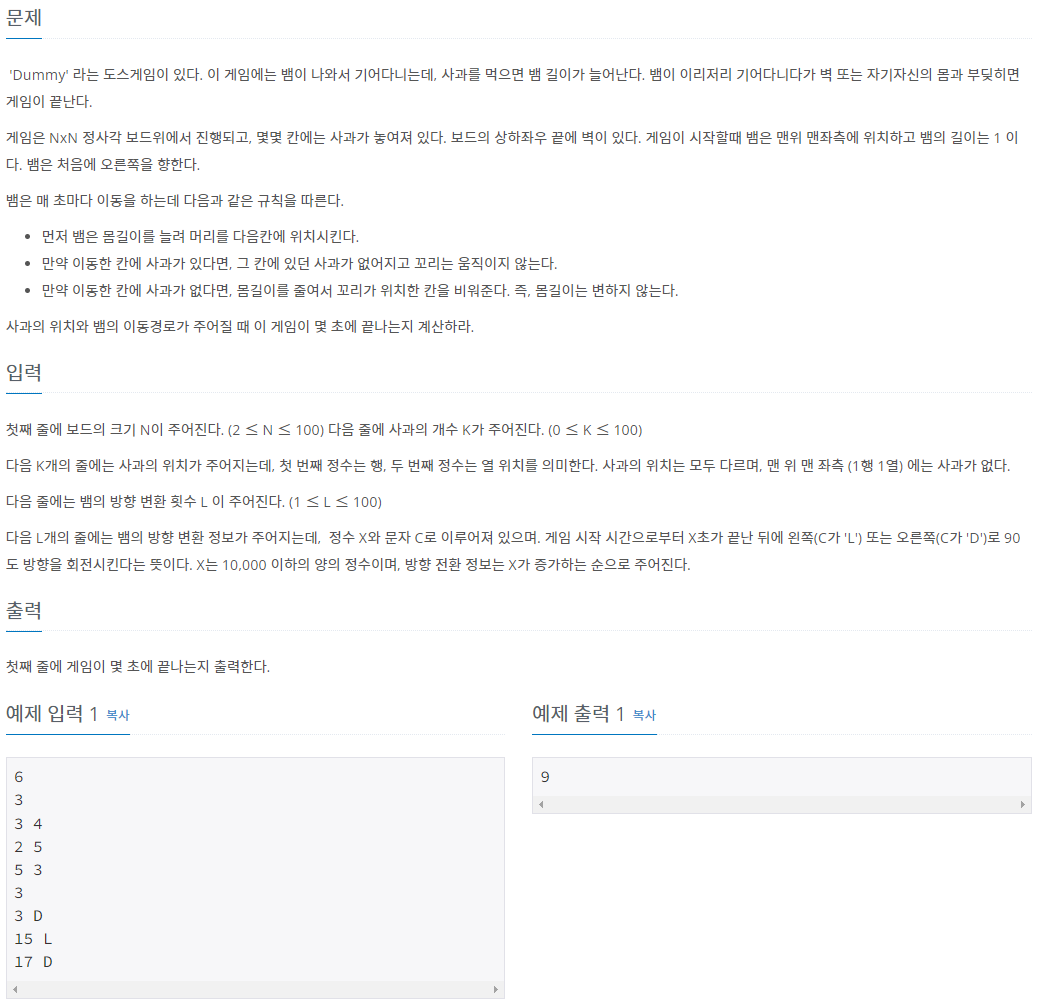

In [89]:
def turn(rotation, now_r):    ## 다음 방향 지정
    if rotation == 'D':
        if now_r -1 == -1:
            now_r = 3
        else:
            now_r = (now_r-1)
    else:
        if now_r + 1 ==4:
            now_r =0
        else: 
            now_r = (now_r+1)
    return now_r

In [90]:
N = 6 ## 맵 길이 
K = 3 ## number of apple
apple_location = [(3,4), (2,5), (5,3)]
X = 3 ## number of rotation
rotation = ["D","L","D"] ## D = right, L = ㅣeft
rotation_time = [3,15,17]

def Dammy(N, K, apple_location, X, rotation, rotation_time):
    ## 맵 만들고 사과 위치시킴 
    map_apple = [[0]*N for _ in range (N)] 
    for a in apple_location:
        map_apple[a[1]-1][a[0]-1] = 1

    x,y = 0,0 ## 시작 위치
    snake = [(x, y)]
    time = 1 
    now_r = 0 ## 현재 방향 (동쪽으로 시작)
    index = 0
    map_apple[x][y] = 2  ## 뱀의 위치를 2로 함

    # 동, 북, 서, 남
    dx = [0, -1, 0, 1]
    dy = [1, 0, -1, 0]

    while True:
        nx = x + dx[now_r]
        ny = y + dy[now_r]
        time += 1
        if 0 <= nx < N and 0 <= ny < N and map_apple[nx][ny] != 2: ## 벽에 닿지 않고, 뱀의 몸에 닿지 않았을 때 
            if map_apple[nx][ny] == 0: ## 사과 없
                map_apple[nx][ny] = 2  ## 현재 위치 값 변경
                snake.append((nx,ny))   
                prev_x, prev_y = snake.pop(0)   ## 이전 위치 초기화
                map_apple[prev_x][prev_y] = 0

            elif map_apple[nx][ny] == 1: # 사과 있
                map_apple[nx][ny] = 2 
                snake.append((nx,ny))

            if time == rotation_time[index] and index < X: ## 방향 바꿀 시간이 되면
                now_r = turn(rotation[index], now_r)
                index += 1
            x = nx
            y = ny
        else:
            return time


In [91]:
Dammy(N, K, apple_location, X, rotation, rotation_time)

9

2. 기둥과 보 설치  
- 문제 설명      
    빙하가 깨지면서 스노우타운에 떠내려 온 "죠르디"는 인생 2막을 위해 주택 건축사업에 뛰어들기로 결심하였습니다. "죠르디"는 기둥과 보를 이용하여 벽면 구조물을 자동으로 세우는 로봇을 개발할 계획인데, 그에 앞서 로봇의 동작을 시뮬레이션 할 수 있는 프로그램을 만들고 있습니다.
    프로그램은 2차원 가상 벽면에 기둥과 보를 이용한 구조물을 설치할 수 있는데, 기둥과 보는 길이가 1인 선분으로 표현되며 다음과 같은 규칙을 가지고 있습니다.

    1. 기둥은 바닥 위에 있거나 보의 한쪽 끝 부분 위에 있거나, 또는 다른 기둥 위에 있어야 합니다.
    2. 보는 한쪽 끝 부분이 기둥 위에 있거나, 또는 양쪽 끝 부분이 다른 보와 동시에 연결되어 있어야 합니다.
    3. 단, 바닥은 벽면의 맨 아래 지면을 말합니다.

2차원 벽면은 n x n 크기 정사각 격자 형태이며, 각 격자는 1 x 1 크기입니다. 맨 처음 벽면은 비어있는 상태입니다. 기둥과 보는 격자선의 교차점에 걸치지 않고, 격자 칸의 각 변에 정확히 일치하도록 설치할 수 있습니다. 다음은 기둥과 보를 설치해 구조물을 만든 예시입니다.    
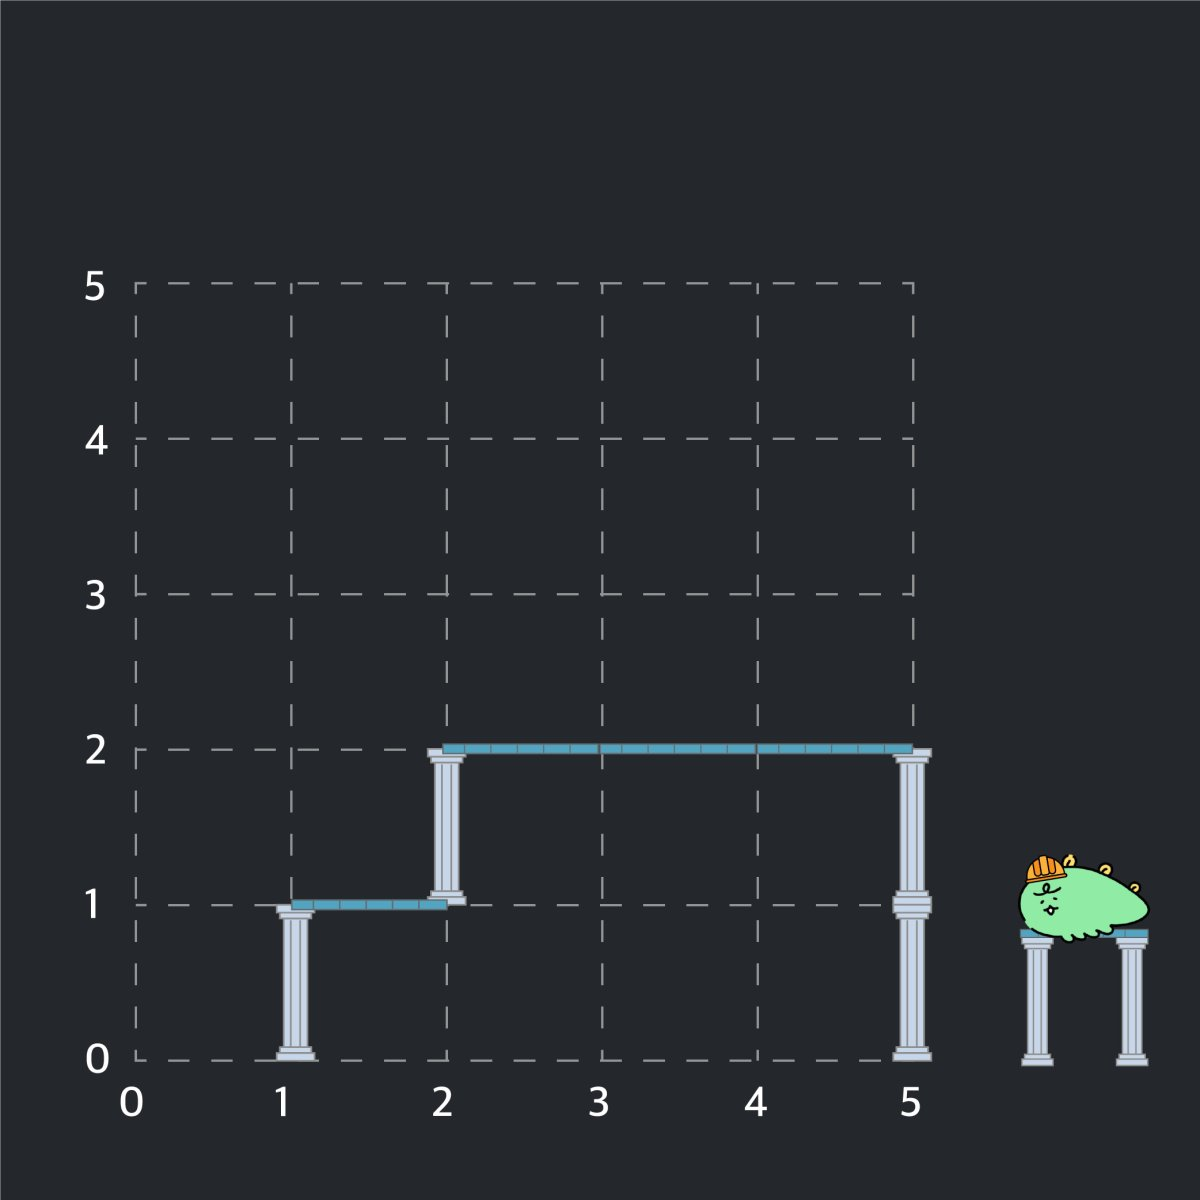

**    예를 들어, 위 그림은 다음 순서에 따라 구조물을 만들었습니다.

    1. (1, 0)에서 위쪽으로 기둥을 하나 설치 후, (1, 1)에서 오른쪽으로 보를 하나 만듭니다.
    2. (2, 1)에서 위쪽으로 기둥을 하나 설치 후, (2, 2)에서 오른쪽으로 보를 하나 만듭니다.
    3. (5, 0)에서 위쪽으로 기둥을 하나 설치 후, (5, 1)에서 위쪽으로 기둥을 하나 더 설치합니다.
    4. (4, 2)에서 오른쪽으로 보를 설치 후, (3, 2)에서 오른쪽으로 보를 설치합니다.
    만약 (4, 2)에서 오른쪽으로 보를 먼저 설치하지 않고, (3, 2)에서 오른쪽으로 보를 설치하려 한다면 2번 규칙에 맞지 않으므로 설치가 되지 않습니다. 기둥과 보를 삭제하는 기능도 있는데 기둥과 보를 삭제한 후에 남은 기둥과 보들 또한 위 규칙을 만족해야 합니다. 만약, 작업을 수행한 결과가 조건을 만족하지 않는다면 해당 작업은 무시됩니다.

    벽면의 크기 n, 기둥과 보를 설치하거나 삭제하는 작업이 순서대로 담긴 2차원 배열 build_frame이 매개변수로 주어질 때, 모든 명령어를 수행한 후 구조물의 상태를 return 하도록 solution 함수를 완성해주세요.



In [149]:
def check (answer):
    for x,y, what in answer:
        if what == 0 : #기둥
            if y == 0 or [x, y-1 ,0] in answer or [x-1, y, 1] in answer or  [x, y, 1] in answer:
                continue
            else:
                return False
        elif what == 1: ## 보
            if [x, y-1, 0] in answer or [x+1, y -1, 0] in answer or ([x-1, y, 1] in answer and [x+1, y, 1] in answer):## 아래에서 올라온 기둥이 있거나 
                    continue
            else:
                return False
    return True            

In [151]:
def solution(build_frame):
    answer = []
    for frame in build_frame:
        x, y, what, how = frame
        if how == 1:
            answer.append([x,y,what])
            if check(answer) is False:
                answer.remove([x, y, what])
        else:
            answer.remove([x,y,what])
            if check(answer) is False:
                answer.append([x,y,what])

    return sorted(answer)

In [152]:
build_frame = [[0, 0, 0, 1], [2, 0, 0, 1], [4, 0, 0, 1], [0, 1, 1, 1], [1, 1, 1, 1], [2, 1, 1, 1], [3, 1, 1, 1], [2, 0, 0, 0], [1, 1, 1, 0], [2, 2, 0, 1]]
solution(build_frame)

[[0, 0, 0], [0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1], [4, 0, 0]]

In [153]:
build_frame = [[1,0,0,1],[1,1,1,1],[2,1,0,1],[2,2,1,1],[5,0,0,1],[5,1,0,1],[4,2,1,1],[3,2,1,1]]
solution(build_frame)

[[1, 0, 0],
 [1, 1, 1],
 [2, 1, 0],
 [2, 2, 1],
 [3, 2, 1],
 [4, 2, 1],
 [5, 0, 0],
 [5, 1, 0]]